In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [36]:
def fica(income, cap = 160200, self_employed = False):
    if self_employed == True:
        fica = 0.124
        if income < cap:
            taxes = fica * income
            tax_rate = fica
        else:
            taxes = fica * cap
            tax_rate = taxes / income
        
    else:
        fica = 0.062
        if income < cap:
            taxes = fica * income
            tax_rate = fica
        else:
            taxes = fica * cap
            tax_rate = taxes / income

    results_dict = {'Total Taxes Paid': taxes, 'Effective Tax Rate': tax_rate}
    return results_dict['Effective Tax Rate']

In [37]:
fica(100000)

0.062

In [38]:
fica(200000)

0.049662

In [39]:
fica(1000000)

0.0099324

In [41]:
x = np.linspace(0, 1000000, 100001)
y = np.empty(x.shape)

for l in range(len(y)):
    y[l] = fica(x[l])

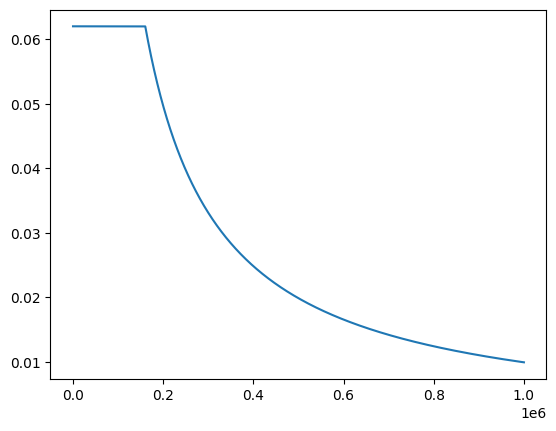

In [51]:
plt.plot(x, y)

In [84]:
x_series = pd.Series(x)
y_series = pd.Series(y)

df = pd.DataFrame([x_series, y_series])
df = df.T

In [85]:
df.columns = ['Income ($)', 'Tax Rate']
df

Income ($)  Tax Rate
0              0.0  0.062000
1             10.0  0.062000
2             20.0  0.062000
3             30.0  0.062000
4             40.0  0.062000
...            ...       ...
99996     999960.0  0.009933
99997     999970.0  0.009933
99998     999980.0  0.009933
99999     999990.0  0.009932
100000   1000000.0  0.009932

[100001 rows x 2 columns]

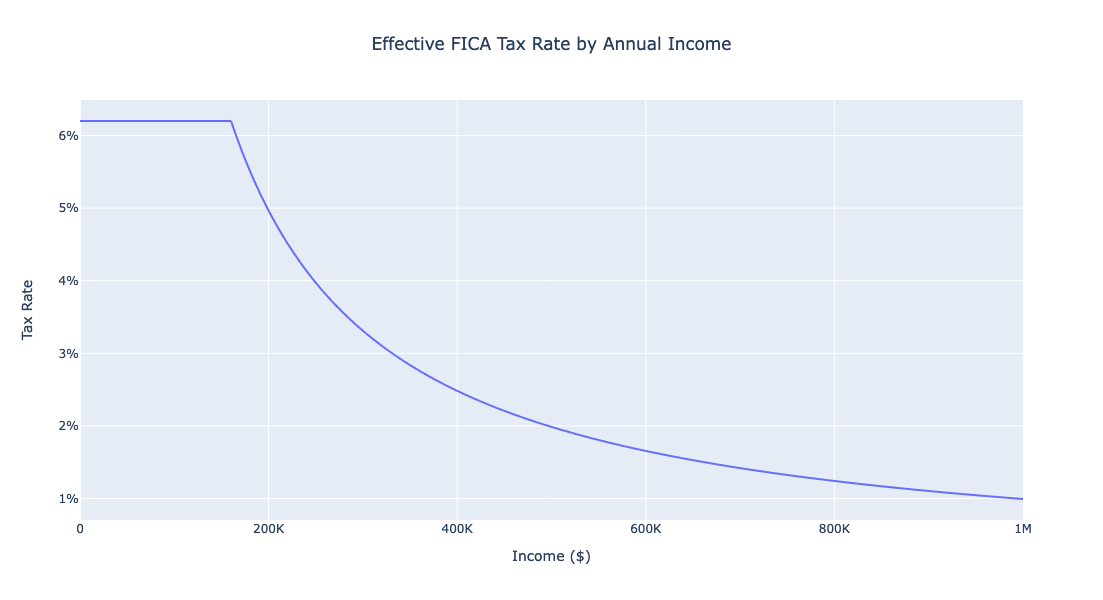

In [86]:
fig = px.line(df, x = 'Income ($)', y = 'Tax Rate', title  = 'Effective FICA Tax Rate by Annual Income', width = 1000, height = 600)
fig.update_layout(title_x = 0.5)
fig.update_layout(xaxis = dict(tickvals = [0, 200000, 400000, 600000, 800000, 1000000], ticktext = ['0', '200K', '400K', '600K', '800K', '1M']))
fig.update_layout(yaxis = dict(tickvals = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06], ticktext = ['1%', '2%', '3%', '4%', '5%', '6%']))
fig.show()